**Problem statement :**
- The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

- The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

- The total cost of a prediction model the sum of `Cost_1` multiplied by the number of Instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while `Cost_2` refer to the cost of missing a faulty truck, which may cause a breakdown.

`Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/train.csv', na_values='na')
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [8]:
df.isna().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [9]:
df.shape

(36188, 171)

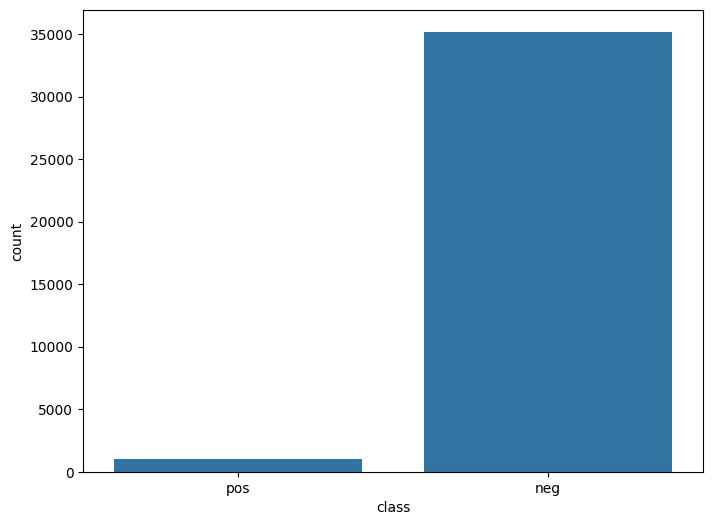

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.show()

Problem 1: We need to handle data imbalance

In [11]:
# Count of numeric/non-numeric features
numerics = df.select_dtypes(include=['int', 'float']).columns
categoricals = df.select_dtypes('object').columns

print(numerics, categoricals, sep='\n')

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)
Index(['class'], dtype='object')


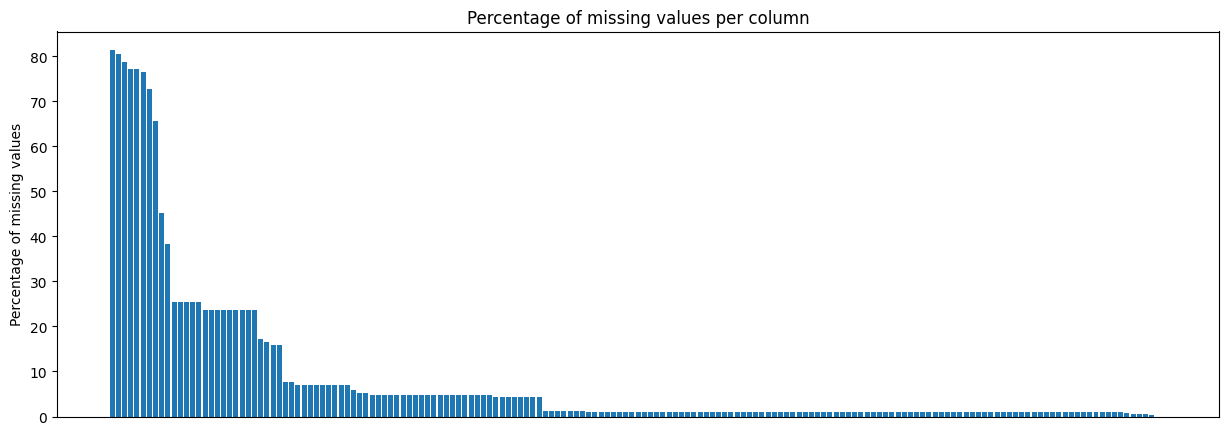

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False) # Calc %, and sort

plt.bar(missing.index, missing.values.T[0]) # "missing.values.T[0]" is same as "missing.values.reshape(1, -1)"

plt.title('Percentage of missing values per column')
plt.ylabel('Percentage of missing values')
plt.xticks([])
plt.show()

In [13]:
# Drop cols having > 70% missing values

dropcols = missing[missing[0] > 70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [14]:
df.drop(columns=dropcols.index, inplace=True)
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,182.0,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [15]:
# Problem 2: Missing data

In [37]:
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

missing_percent = total_missing / total_cells * 100
missing_percent

5.37059852747306

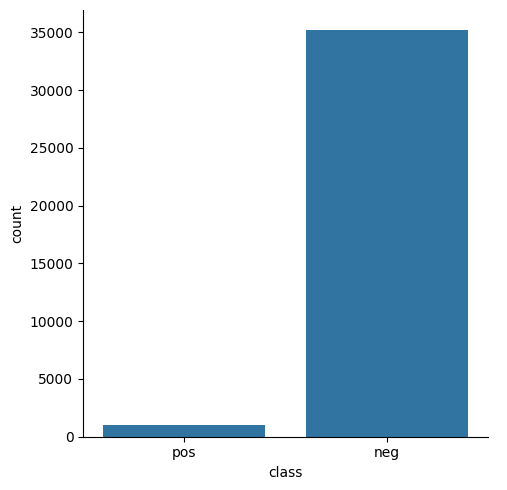

In [35]:
sns.catplot(x='class', data=df, kind='count'); # Huge imbalance

In [38]:
X = df.drop('class', axis=1)
y = df['class']

In [45]:
# Manually encode target

y = y.replace({'pos': 1, 'neg': 0})
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [47]:
# Experiment 1: Replace with mean()
# Experiment 2: Replace with constant
# Experiment 3: Replace with median()

In [ ]:
# Robust scaler also takes care of scaling outliers.

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

robust_sc = RobustScaler()
X = robust_sc.fit_transform(X)
X

array([[ 2.48316651e+00,  3.16455696e-02,             nan, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58106804e+00,  2.92616034e+00,             nan, ...,
         3.42616452e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43005945e-01,  1.52109705e+00,  2.26470588e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.28301407e-01,  2.24758046e+06, -2.69607843e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00129058e+00,  2.24758046e+06,  8.97058824e-01, ...,
         1.92478692e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.86901072e-01,  5.75949367e-01,  1.22549020e+00, ...,
         7.82953419e-02,  0.00000000e+00,  0.00000000e+00]])

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [58]:
mean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])
mean_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('RobustScaler', RobustScaler())])

In [59]:
X_mean = mean_pipeline.fit_transform(X) # Returns a (1, n) np array

In [62]:
# SMOTETomek does oversampling and undersampling combined.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

smote_tomek = SMOTETomek(sampling_strategy='minority', random_state=42, n_jobs=-1)
X_resampled, y_resampled = smote_tomek.fit_resample(X_mean, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XG Boost': XGBClassifier()
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score confusion_matrix, classification_report

def eval_classifier(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  return acc, prec, recall, f1, auc

def calc_total_cost(y_test, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  cost = 10 * fp + 500 * fn
  return cost

def eval_models(X, y, models):
  costs, = []
  models_list = []
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  for i in range(len(list(models))):
    model = list(models.values())[i] # Take each model instance
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    acc, prec, recall, f1, auc = eval_classifier(y_test, y_pred)


In [68]:
models.values()

dict_values([RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)])